In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

606

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6b0076e8001730f0022f3a6be4cb9086


In [8]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port hedland
Processing Record 2 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 3 of Set 1 | labuhan
Processing Record 4 of Set 1 | bambous virieux
Processing Record 5 of Set 1 | alexandria
Processing Record 6 of Set 1 | hithadhoo
Processing Record 7 of Set 1 | standerton
Processing Record 8 of Set 1 | cedar city
Processing Record 9 of Set 1 | kaeo
Processing Record 10 of Set 1 | tuktoyaktuk
Processing Record 11 of Set 1 | paharpur
Processing Record 12 of Set 1 | le port
Processing Record 13 of Set 1 | nanortalik
Processing Record 14 of Set 1 | mataura
Processing Record 15 of Set 1 | butaritari
Processing Record 16 of Set 1 | albany
Processing Record 17 of Set 1 | punta arenas
Processing Record 18 of Set 1 | amderma
City not found. Skipping...
Processing Record 19 of Set 1 | ribeira grande
Processing Record 20 of Set 1 | thinadhoo
Processing Record 21 of Set 1 | nagato


Processing Record 39 of Set 4 | pedernales
Processing Record 40 of Set 4 | namibe
Processing Record 41 of Set 4 | bethel
Processing Record 42 of Set 4 | port hardy
Processing Record 43 of Set 4 | leland
Processing Record 44 of Set 4 | grand river south east
City not found. Skipping...
Processing Record 45 of Set 4 | dikson
Processing Record 46 of Set 4 | karratha
Processing Record 47 of Set 4 | lagoa
Processing Record 48 of Set 4 | caravelas
Processing Record 49 of Set 4 | upington
Processing Record 50 of Set 4 | phan thiet
Processing Record 1 of Set 5 | vao
Processing Record 2 of Set 5 | brazzaville
Processing Record 3 of Set 5 | codrington
Processing Record 4 of Set 5 | bocaranga
City not found. Skipping...
Processing Record 5 of Set 5 | victoria
Processing Record 6 of Set 5 | sorong
Processing Record 7 of Set 5 | attawapiskat
City not found. Skipping...
Processing Record 8 of Set 5 | benavente
Processing Record 9 of Set 5 | likasi
Processing Record 10 of Set 5 | pontecorvo
Processin

Processing Record 33 of Set 8 | ojinaga
Processing Record 34 of Set 8 | sola
Processing Record 35 of Set 8 | bengkulu
Processing Record 36 of Set 8 | coahuayana
Processing Record 37 of Set 8 | qinhuangdao
Processing Record 38 of Set 8 | pizarro
Processing Record 39 of Set 8 | hambantota
Processing Record 40 of Set 8 | waingapu
Processing Record 41 of Set 8 | mimongo
Processing Record 42 of Set 8 | isangel
Processing Record 43 of Set 8 | tabuk
Processing Record 44 of Set 8 | payakumbuh
Processing Record 45 of Set 8 | puerto quijarro
Processing Record 46 of Set 8 | bontang
Processing Record 47 of Set 8 | valparaiso
Processing Record 48 of Set 8 | ulaangom
Processing Record 49 of Set 8 | santa cruz
Processing Record 50 of Set 8 | maniitsoq
Processing Record 1 of Set 9 | linjiang
Processing Record 2 of Set 9 | aden
Processing Record 3 of Set 9 | mantua
Processing Record 4 of Set 9 | russell
Processing Record 5 of Set 9 | sao joao da barra
Processing Record 6 of Set 9 | derzhavinsk
Processi

Processing Record 25 of Set 12 | baykit
Processing Record 26 of Set 12 | pisco
Processing Record 27 of Set 12 | pochutla
Processing Record 28 of Set 12 | kazalinsk
City not found. Skipping...
Processing Record 29 of Set 12 | lillesand
Processing Record 30 of Set 12 | warqla
City not found. Skipping...
Processing Record 31 of Set 12 | one hundred mile house
City not found. Skipping...
Processing Record 32 of Set 12 | alice springs
Processing Record 33 of Set 12 | bubanza
Processing Record 34 of Set 12 | kamenskoye
City not found. Skipping...
Processing Record 35 of Set 12 | gewane
Processing Record 36 of Set 12 | sisimiut
Processing Record 37 of Set 12 | ha giang
Processing Record 38 of Set 12 | kawalu
Processing Record 39 of Set 12 | sentyabrskiy
City not found. Skipping...
Processing Record 40 of Set 12 | wexford
Processing Record 41 of Set 12 | grafenau
Processing Record 42 of Set 12 | kirakira
Processing Record 43 of Set 12 | quepos
Processing Record 44 of Set 12 | srednekolymsk
Pro

In [10]:
len(city_data)

568

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Port Hedland,-20.3167,118.5667,87.85,25,32,13.80,AU,2022-04-14 21:44:07
1,Labuhan,-6.8844,112.2051,76.78,84,82,4.92,ID,2022-04-14 21:41:35
2,Bambous Virieux,-20.3428,57.7575,78.22,73,75,12.66,MU,2022-04-14 21:34:52
3,Alexandria,31.2156,29.9553,60.76,67,0,9.22,EG,2022-04-14 21:46:57
4,Hithadhoo,-0.6000,73.0833,83.19,72,97,7.54,MV,2022-04-14 21:39:13
5,Standerton,-26.9337,29.2415,59.61,69,1,2.04,ZA,2022-04-14 21:46:58
6,Cedar City,37.6775,-113.0619,58.17,17,0,16.11,US,2022-04-14 21:43:55
7,Kaeo,-35.1000,173.7833,61.32,91,1,4.18,NZ,2022-04-14 21:46:58
8,Tuktoyaktuk,69.4541,-133.0374,-2.20,78,20,10.36,CA,2022-04-14 21:46:58
9,Paharpur,32.1038,70.9724,79.70,29,0,4.97,PK,2022-04-14 21:46:58


In [13]:
# rearrange column order
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Port Hedland,AU,2022-04-14 21:44:07,-20.3167,118.5667,87.85,25,32,13.80
1,Labuhan,ID,2022-04-14 21:41:35,-6.8844,112.2051,76.78,84,82,4.92
2,Bambous Virieux,MU,2022-04-14 21:34:52,-20.3428,57.7575,78.22,73,75,12.66
3,Alexandria,EG,2022-04-14 21:46:57,31.2156,29.9553,60.76,67,0,9.22
4,Hithadhoo,MV,2022-04-14 21:39:13,-0.6000,73.0833,83.19,72,97,7.54
5,Standerton,ZA,2022-04-14 21:46:58,-26.9337,29.2415,59.61,69,1,2.04
6,Cedar City,US,2022-04-14 21:43:55,37.6775,-113.0619,58.17,17,0,16.11
7,Kaeo,NZ,2022-04-14 21:46:58,-35.1000,173.7833,61.32,91,1,4.18
8,Tuktoyaktuk,CA,2022-04-14 21:46:58,69.4541,-133.0374,-2.20,78,20,10.36
9,Paharpur,PK,2022-04-14 21:46:58,32.1038,70.9724,79.70,29,0,4.97


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

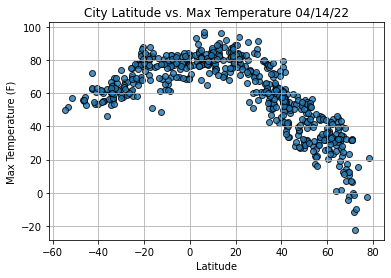

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

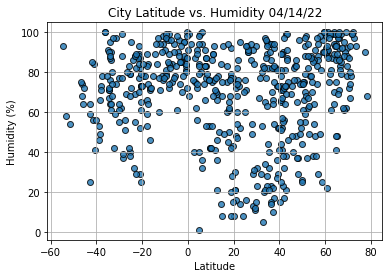

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

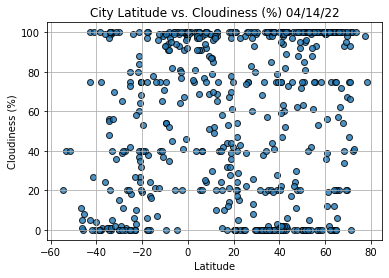

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()